## Libraries

In [75]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

# 设置全局选项
pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
# plot in the Notebook
%matplotlib inline

## Read in data

In [4]:
GCSE_dataset = pd.read_csv('Cleaned_Dataset.csv')

In [12]:
GCSE_dataset.shape

(224, 49)

In [11]:
GCSE_dataset.head()

,Borough_Year,student_number,Average_Attainment_8_score,English_Math_95_pass,student_number_boys,Average_Attainment_8_score_boys,student_number_girls,Average_Attainment_8_score_girls,White_score,Mixed_score,...,fte_classroom_teachers,fte_leadership_teachers,hc_workforce,hc_all_teachers,hc_classroom_teachers,hc_leadership_teachers,percent_pt_teacher,ta_to_all_ratio,average_mean,teachers_leadership_payrange_percent
0,Barking and Dagenham_202122,2807,49.3000,50.6000,1496,47.0000,1311,51.9000,43.6000,47.0000,...,95.1500,10.3833,179.3333,108.8333,98.3333,10.5000,8.2667,0.2167,"48,862.7583",10.0621
1,Barnet_202122,4265,58.1000,66.8000,2210,56.9000,2055,59.5000,57.1000,57.9000,...,60.5675,8.1193,124.8214,76.7500,68.2500,8.5000,22.8929,0.1893,"46,195.0536",11.4836
2,Bexley_202122,3215,52.3000,54.6000,1658,50.3000,1557,54.4000,47.6000,53.2000,...,63.1740,8.6167,129.2000,75.6667,66.8667,8.8000,13.6400,0.1467,"46,192.3067",12.3513
3,Brent_202122,3136,52.4000,56.7000,1619,50.5000,1517,54.5000,55.2000,49.6000,...,77.1067,8.0387,143.4000,88.3333,80.0667,8.2667,10.9533,0.1667,"48,657.3800",9.7265
4,Bromley_202122,3578,53.9000,59.8000,1779,51.5000,1799,56.3000,52.1000,52.5000,...,64.4758,8.0737,128.6316,78.6842,70.3158,8.3684,23.0526,0.1789,"47,039.3895",11.1722


In [10]:
GCSE_dataset.()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Borough_Year                          224 non-null    object 
 1   student_number                        224 non-null    int64  
 2   Average_Attainment_8_score            224 non-null    float64
 3   English_Math_95_pass                  224 non-null    float64
 4   student_number_boys                   224 non-null    int64  
 5   Average_Attainment_8_score_boys       224 non-null    float64
 6   student_number_girls                  224 non-null    int64  
 7   Average_Attainment_8_score_girls      224 non-null    float64
 8   White_score                           224 non-null    float64
 9   Mixed_score                           224 non-null    float64
 10  Asian_score                           221 non-null    float64
 11  Black_score        

In [9]:
GCSE_dataset = GCSE_dataset.drop('English_Math_94_pass', axis=1)

In [13]:
GCSE_dataset.shape

(224, 49)

In [15]:
GCSE_dataset_Matrix = GCSE_dataset.drop('Borough_Year', axis=1)

In [70]:
GCSE_dataset_Matrix['boys_ratio'] = GCSE_dataset_Matrix ['student_number_boys'] / GCSE_dataset_Matrix ['student_number'] 
GCSE_dataset_Matrix['boys_score_ratio'] = GCSE_dataset_Matrix ['Average_Attainment_8_score_boys'] / GCSE_dataset_Matrix ['Average_Attainment_8_score'] 
GCSE_dataset_Matrix['girls_score_ratio'] = GCSE_dataset_Matrix ['Average_Attainment_8_score_girls'] / GCSE_dataset_Matrix ['Average_Attainment_8_score'] 

## Checking the correlation between variables

Before modelling, we always want to know the correlation between variables before building models. We will use the ```dataframe.corr()``` function to generate the correlation matrix and plot it.

You can check the collinearity between attributes using a correlation matrix as below. Here is a question for you:

- **What can you say about this plot? For example, which pair of variables are highly correlated, and can you explain it?**

Text(0.5, 1.0, 'Correlation Matrix')

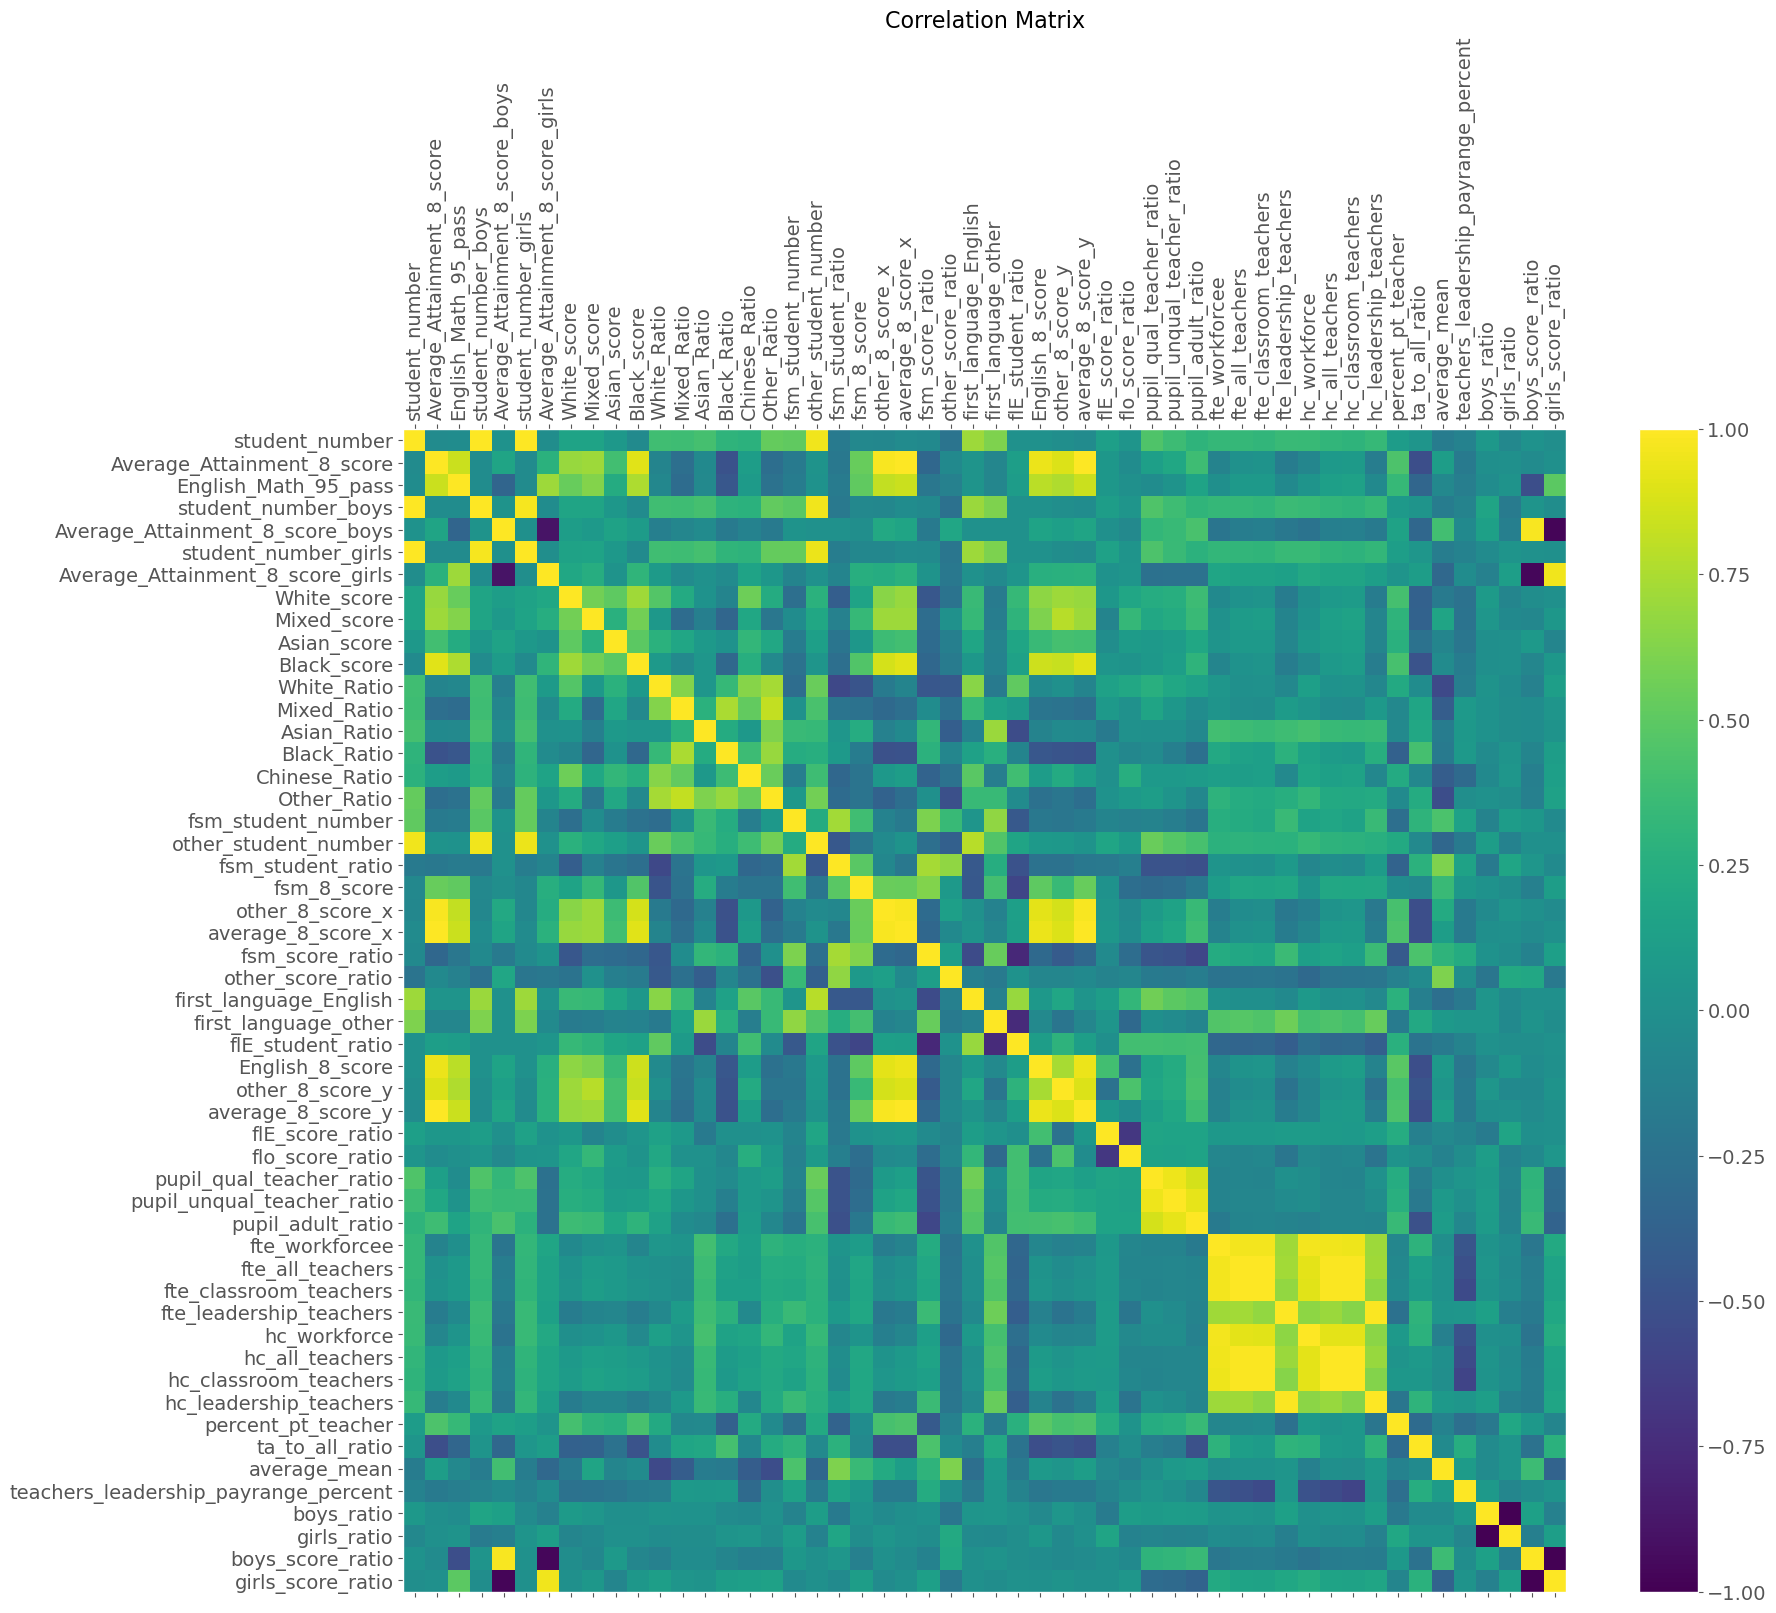

In [71]:
df = GCSE_dataset_Matrix
plt.rcParams["axes.grid"] = False # 禁用绘图的坐标轴网格线
f = plt.figure(figsize=(19, 15))
# plt.matshow(df.corr(), fignum=f.number, cmap='RdBu_r')  
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [74]:
student_number                        
Average_Attainment_8_score            
English_Math_95_pass               
Average_Attainment_8_score_boys       
boys_score_ratio

White_score                           
Mixed_score                           
Asian_score                           
Black_score  
White_Ratio                           
Mixed_Ratio                          
Asian_Ratio                           
Black_Ratio                           
Chinese_Ratio                         
Other_Ratio                           



 18  fsm_student_number                    224 non-null    int64  
 19  other_student_number                  224 non-null    int64  
 20  fsm_student_ratio                     224 non-null    float64
 21  fsm_8_score                           224 non-null    float64
 22  other_8_score_x                       224 non-null    float64
 23  average_8_score_x                     224 non-null    float64
 24  fsm_score_ratio                       224 non-null    float64
 25  other_score_ratio                     224 non-null    float64
 26  first_language_English                224 non-null    int64  
 27  first_language_other                  224 non-null    int64  
 28  flE_student_ratio                     224 non-null    float64
 29  English_8_score                       224 non-null    float64
 30  other_8_score_y                       224 non-null    float64
 31  average_8_score_y                     224 non-null    float64
 32  flE_score_ratio                       224 non-null    float64
 33  flo_score_ratio                       224 non-null    float64
 34  pupil_qual_teacher_ratio              224 non-null    float64
 35  pupil_unqual_teacher_ratio            224 non-null    float64
 36  pupil_adult_ratio                     224 non-null    float64
 37  fte_workforcee                        224 non-null    float64
 38  fte_all_teachers                      224 non-null    float64
 39  fte_classroom_teachers                224 non-null    float64
 40  fte_leadership_teachers               224 non-null    float64
 41  hc_workforce                          224 non-null    float64
 42  hc_all_teachers                       224 non-null    float64
 43  hc_classroom_teachers                 224 non-null    float64
 44  hc_leadership_teachers                224 non-null    float64
 45  percent_pt_teacher                    224 non-null    float64
 46  ta_to_all_ratio                       224 non-null    float64
 47  average_mean                          224 non-null    float64
 48  teachers_leadership_payrange_percent 

boys_ratio



       'White_score', 'Mixed_score', 'Asian_score', 'Black_score',
       'White_Ratio', 'Asian_Ratio', 'Black_Ratio', 'Chinese_Ratio',


       'fsm_score_ratio', 'other_score_ratio', 'flE_score_ratio',
       'flo_score_ratio', 'pupil_unqual_teacher_ratio',
       'hc_leadership_teachers', 'percent_pt_teacher', 'ta_to_all_ratio',
       'average_mean', 'teachers_leadership_payrange_percent', 'girls_ratio'




<Figure size 640x480 with 0 Axes>

Based on the correlation matrix above, we can drop some variables such as max_temp, min_temp, cloud_cover and pressure.

## Using VIF to deal with multicollinearity

In [63]:
# 检查数据集中是否有缺失值
print(GCSE_dataset_Matrix.isnull().sum())

# 处理缺失值，例如通过删除包含缺失值的行
GCSE_dataset_Matrix = GCSE_dataset_Matrix.dropna()

# 检查数据集中是否有无限值
print(np.isinf(GCSE_dataset_Matrix).sum())

# 替换或删除无限值
GCSE_dataset_Matrix = GCSE_dataset_Matrix.replace([np.inf, -np.inf], np.nan).dropna()


student_number                          0
Average_Attainment_8_score              0
English_Math_95_pass                    0
student_number_boys                     0
Average_Attainment_8_score_boys         0
student_number_girls                    0
Average_Attainment_8_score_girls        0
White_score                             0
Mixed_score                             0
Asian_score                             0
Black_score                             0
White_Ratio                             0
Mixed_Ratio                             0
Asian_Ratio                             0
Black_Ratio                             0
Chinese_Ratio                           0
Other_Ratio                             0
fsm_student_number                      0
other_student_number                    0
fsm_student_ratio                       0
fsm_8_score                             0
other_8_score_x                         0
average_8_score_x                       0
fsm_score_ratio                   

In [64]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    df = df.replace({True: 1, False: 0}) # convert bool to int
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [65]:
GCSE_dataset_Matrix.shape

(221, 51)

In [66]:
columns_to_drop = ['Average_Attainment_8_score']

GCSE_dataset_VIF_new = drop_column_using_vif_(GCSE_dataset_Matrix.drop(columns = columns_to_drop))


/opt/conda/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping: student_number
Dropping: average_8_score_x


/opt/conda/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping: fte_all_teachers
Dropping: hc_all_teachers


/opt/conda/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping: boys_ratio
Dropping: average_8_score_y
Dropping: boys_score_ratio
Dropping: other_8_score_x
Dropping: other_student_number
Dropping: first_language_English
Dropping: English_8_score
Dropping: hc_classroom_teachers
Dropping: student_number_boys
Dropping: fsm_8_score
Dropping: Other_Ratio
Dropping: Average_Attainment_8_score_girls
Dropping: fte_workforcee
Dropping: other_8_score_y
Dropping: pupil_adult_ratio
Dropping: first_language_other
Dropping: fte_leadership_teachers
Dropping: fsm_student_ratio
Dropping: pupil_qual_teacher_ratio
Dropping: hc_workforce
Dropping: English_Math_95_pass
Dropping: fsm_student_number
Dropping: fte_classroom_teachers
Dropping: Mixed_Ratio
Dropping: flE_student_ratio


In [68]:
GCSE_dataset_VIF_new.columns

Index(['Average_Attainment_8_score_boys', 'student_number_girls',
       'White_score', 'Mixed_score', 'Asian_score', 'Black_score',
       'White_Ratio', 'Asian_Ratio', 'Black_Ratio', 'Chinese_Ratio',
       'fsm_score_ratio', 'other_score_ratio', 'flE_score_ratio',
       'flo_score_ratio', 'pupil_unqual_teacher_ratio',
       'hc_leadership_teachers', 'percent_pt_teacher', 'ta_to_all_ratio',
       'average_mean', 'teachers_leadership_payrange_percent', 'girls_ratio'],
      dtype='object')

## Multregression

Text(0.5, 1.0, 'Correlation Matrix')

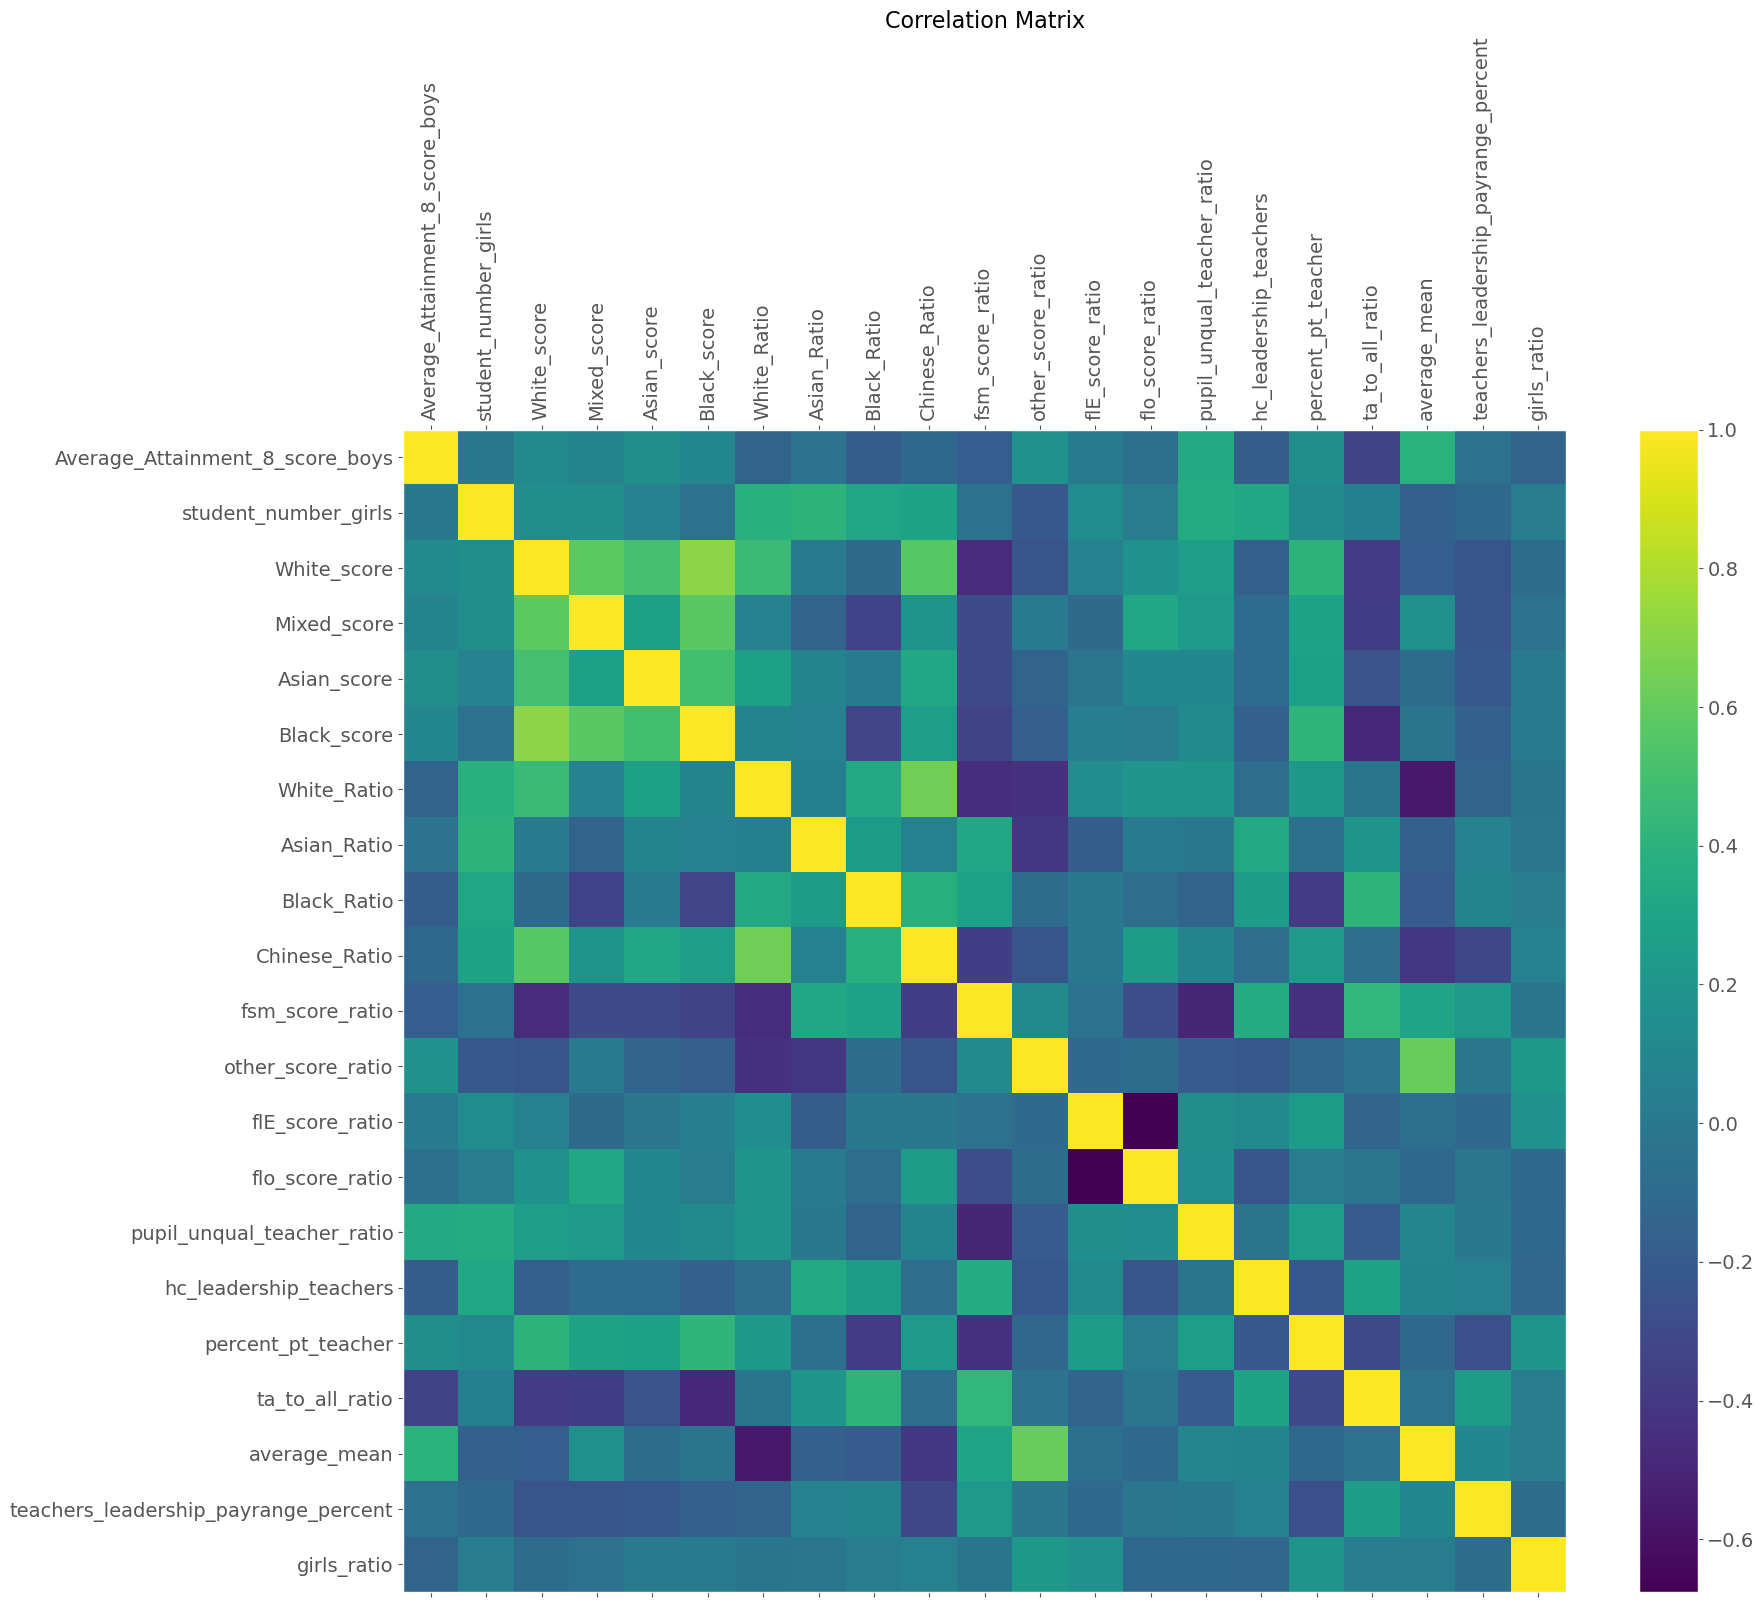

In [69]:
### Just check Correlation Martix

df = GCSE_dataset_VIF_new
plt.rcParams["axes.grid"] = False # 禁用绘图的坐标轴网格线
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

## Building and interpreting a linear regression model

In [51]:
GCSE_dataset_VIF_new.dtypes

student_number_boys                       int64
Average_Attainment_8_score_boys         float64
White_score                             float64
Mixed_score                             float64
Asian_score                             float64
Black_score                             float64
White_Ratio                             float64
Asian_Ratio                             float64
Black_Ratio                             float64
Chinese_Ratio                           float64
fsm_score_ratio                         float64
other_score_ratio                       float64
flE_score_ratio                         float64
flo_score_ratio                         float64
pupil_qual_teacher_ratio                float64
hc_leadership_teachers                  float64
percent_pt_teacher                      float64
ta_to_all_ratio                         float64
average_mean                            float64
teachers_leadership_payrange_percent    float64
dtype: object

In [55]:
GCSE_dataset_VIF_new.columns

Index(['student_number_boys', 'Average_Attainment_8_score_boys', 'White_score',
       'Mixed_score', 'Asian_score', 'Black_score', 'White_Ratio',
       'Asian_Ratio', 'Black_Ratio', 'Chinese_Ratio', 'fsm_score_ratio',
       'other_score_ratio', 'flE_score_ratio', 'flo_score_ratio',
       'pupil_qual_teacher_ratio', 'hc_leadership_teachers',
       'percent_pt_teacher', 'ta_to_all_ratio', 'average_mean',
       'teachers_leadership_payrange_percent'],
      dtype='object')

In [56]:
# build the model, using this equation to formalute the regression model
# 'cnt ~ season_SPRING + season_SUMMER + season_FALL + season_WINTER'
# the left-hand side is the y variable and right-hand side is the x variables

model_cnt_seasons = sm.formula.ols('Average_Attainment_8_score_boys ~ student_number_boys + White_score + Mixed_score + Asian_score + Black_score + White_Ratio + Asian_Ratio + Black_Ratio + Chinese_Ratio + fsm_score_ratio + other_score_ratio + flE_score_ratio + flo_score_ratio + pupil_qual_teacher_ratio + hc_leadership_teachers + percent_pt_teacher + ta_to_all_ratio + average_mean + teachers_leadership_payrange_percent', GCSE_dataset_VIF_new).fit()
model_cnt_seasons.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Average_Attainment_8_score_boys   R-squared:                       0.462
Model:                                         OLS   Adj. R-squared:                  0.411
Method:                              Least Squares   F-statistic:                     9.076
Date:                             Mon, 15 Jan 2024   Prob (F-statistic):           1.85e-18
Time:                                     00:57:09   Log-Likelihood:                -873.55
No. Observations:                              221   AIC:                             1787.
Df Residuals:                                  201   BIC:                             1855.
Df Model:                                       19                                         
Covariance Type:                         nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              336.3452    148.228      2.269      0.024      44.063     628.627
student_number_boys                      0.0017      0.003      0.495      0.621      -0.005       0.008
White_score                              0.6692      0.314      2.132      0.034       0.050       1.288
Mixed_score                             -0.7918      0.357     -2.221      0.027      -1.495      -0.089
Asian_score                              0.2560      0.142      1.805      0.073      -0.024       0.536
Black_score                             -1.0831      0.451     -2.402      0.017      -1.972      -0.194
White_Ratio                             -0.1622      0.140     -1.162      0.246      -0.437       0.113
Asian_Ratio                              0.1298      0.125      1.041      0.299      -0.116       0.376
Black_Ratio                              0.0252      0.223      0.113      0.910      -0.415       0.465
Chinese_Ratio                           -1.1947      6.524     -0.183      0.855     -14.059      11.669
fsm_score_ratio                        -26.8108     27.148     -0.988      0.325     -80.342      26.721
other_score_ratio                     -155.5286     99.917     -1.557      0.121    -352.549      41.492
flE_score_ratio                       -133.0377     55.947     -2.378      0.018    -243.356     -22.720
flo_score_ratio                       -107.5652     41.990     -2.562      0.011    -190.363     -24.767
pupil_qual_teacher_ratio                 3.5810      1.038      3.450      0.001       1.534       5.628
hc_leadership_teachers                  -3.3521      1.055     -3.177      0.002      -5.432      -1.272
percent_pt_teacher                       0.3349      0.307      1.092      0.276      -0.270       0.939
ta_to_all_ratio                        -91.3309     23.455     -3.894      0.000    -137.581     -45.081
average_mean                             0.0036      0.001      6.003      0.000       0.002       0.005
teachers_leadership_payrange_percent    -0.4816      0.555     -0.868      0.386      -1.575       0.612
==============================================================================
Omnibus:                       22.826   Durbin-Watson:                   0.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.018
Skew:                          -0.707   Prob(JB):                     5.00e-07
Kurtosis:                       4.073   Cond. No.                     8.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covaria

In [52]:
Variable_Final = GCSE_dataset_VIF_new.columns.to_list()
print(Variable_Final)

['student_number_boys', 'Average_Attainment_8_score_boys', 'White_score', 'Mixed_score', 'Asian_score', 'Black_score', 'White_Ratio', 'Asian_Ratio', 'Black_Ratio', 'Chinese_Ratio', 'fsm_score_ratio', 'other_score_ratio', 'flE_score_ratio', 'flo_score_ratio', 'pupil_qual_teacher_ratio', 'hc_leadership_teachers', 'percent_pt_teacher', 'ta_to_all_ratio', 'average_mean', 'teachers_leadership_payrange_percent']


In [53]:
GCSE_related = sm.OLS(endog=GCSE_dataset_VIF_new[['Average_Attainment_8_score_boys']], exog=sm.add_constant(GCSE_dataset_VIF_new)).fit()
GCSE_related.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Average_Attainment_8_score_boys   R-squared:                       1.000
Model:                                         OLS   Adj. R-squared:                  1.000
Method:                              Least Squares   F-statistic:                 3.553e+28
Date:                             Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                                     00:44:48   Log-Likelihood:                 6067.8
No. Observations:                              221   AIC:                        -1.209e+04
Df Residuals:                                  200   BIC:                        -1.202e+04
Df Model:                                       20                                         
Covariance Type:                         nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 1.165e-12   3.44e-12      0.339      0.735   -5.62e-12    7.95e-12
student_number_boys                   3.168e-16   7.72e-17      4.104      0.000    1.65e-16    4.69e-16
Average_Attainment_8_score_boys          1.0000   1.62e-15   6.18e+14      0.000       1.000       1.000
White_score                           3.997e-15   7.28e-15      0.549      0.584   -1.04e-14    1.83e-14
Mixed_score                           1.776e-15   8.27e-15      0.215      0.830   -1.45e-14    1.81e-14
Asian_score                           -1.11e-16   3.28e-15     -0.034      0.973   -6.57e-15    6.35e-15
Black_score                           -8.66e-15   1.05e-14     -0.826      0.410   -2.93e-14     1.2e-14
White_Ratio                          -3.178e-15   3.21e-15     -0.990      0.323   -9.51e-15    3.15e-15
Asian_Ratio                           5.898e-16   2.87e-15      0.206      0.837   -5.06e-15    6.24e-15
Black_Ratio                          -5.551e-16   5.12e-15     -0.108      0.914   -1.06e-14    9.53e-15
Chinese_Ratio                        -2.842e-14    1.5e-13     -0.190      0.849   -3.23e-13    2.67e-13
fsm_score_ratio                      -5.684e-14   6.24e-13     -0.091      0.927   -1.29e-12    1.17e-12
other_score_ratio                     6.821e-13    2.3e-12      0.296      0.768   -3.86e-12    5.23e-12
flE_score_ratio                       1.705e-13    1.3e-12      0.131      0.896   -2.39e-12    2.74e-12
flo_score_ratio                      -1.421e-14   9.78e-13     -0.015      0.988   -1.94e-12    1.91e-12
pupil_qual_teacher_ratio             -3.331e-15   2.45e-14     -0.136      0.892   -5.16e-14     4.5e-14
hc_leadership_teachers                2.442e-15   2.48e-14      0.099      0.922   -4.64e-14    5.13e-14
percent_pt_teacher                   -9.437e-16   7.05e-15     -0.134      0.894   -1.48e-14     1.3e-14
ta_to_all_ratio                               0   5.58e-13          0      1.000    -1.1e-12     1.1e-12
average_mean                          -4.18e-17   1.49e-17     -2.811      0.005   -7.11e-17   -1.25e-17
teachers_leadership_payrange_percent  -1.11e-15   1.27e-14     -0.087      0.931   -2.62e-14     2.4e-14
==============================================================================
Omnibus:                       12.292   Durbin-Watson:                   0.548
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.175
Skew:                          -0.006   Prob(JB):                       0.0752
Kurtosis:                       2.250   Cond. No.                     8.98e+06
=========================

# Residuals vs. Fitted plot

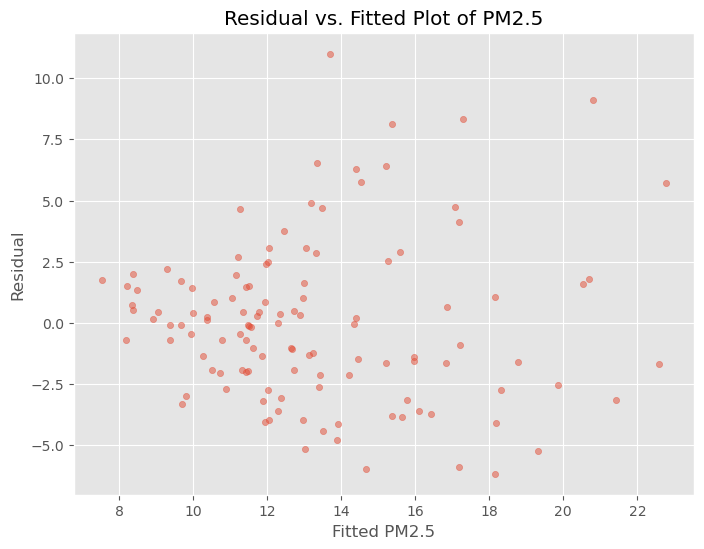

In [77]:
# Residuals vs. Fitted plot_PM2.5

# Set the figure size
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(airquality_weather_PM205.fittedvalues, airquality_weather_PM205.resid, alpha = 0.5, s=20)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted PM2.5')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of PM2.5')
# Adding grid lines
plt.grid(True)
plt.show()

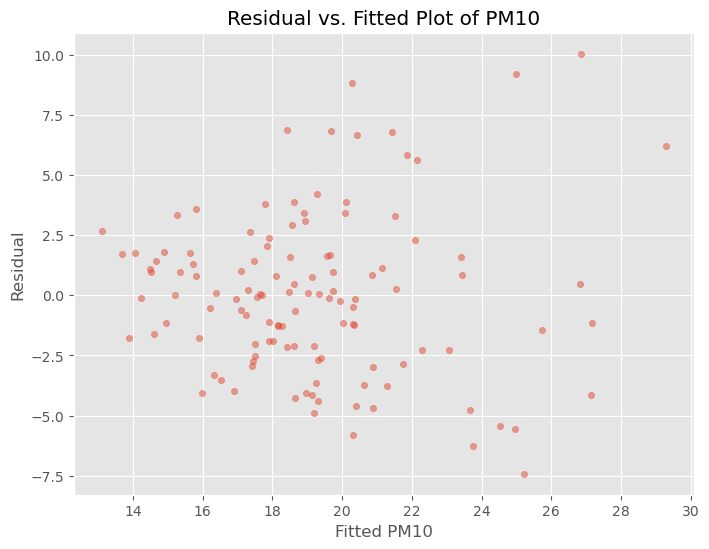

In [78]:
# Residuals vs. Fitted plot_PM10

# Set the figure size
plt.figure(figsize=(8, 6))  
# alpha = 0.5: controlling the transparency of the markers. Here alpha = 0.5 means that the markers are semi-transparent.
# s = 20: controlling the size of the markers. The default value is plt.rcParams['lines.markersize'] ** 2. Here we set it as 20.
# To get the default value of marker size, run the following line
# print(plt.rcParams['lines.markersize'] ** 2) 
plt.scatter(airquality_weather_PM10.fittedvalues, airquality_weather_PM10.resid, alpha = 0.5, s=20)
# plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid, alpha = 0.5)
# adding title and labels
plt.xlabel('Fitted PM10')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of PM10')
# Adding grid lines
plt.grid(True)
plt.show()

# Histogram

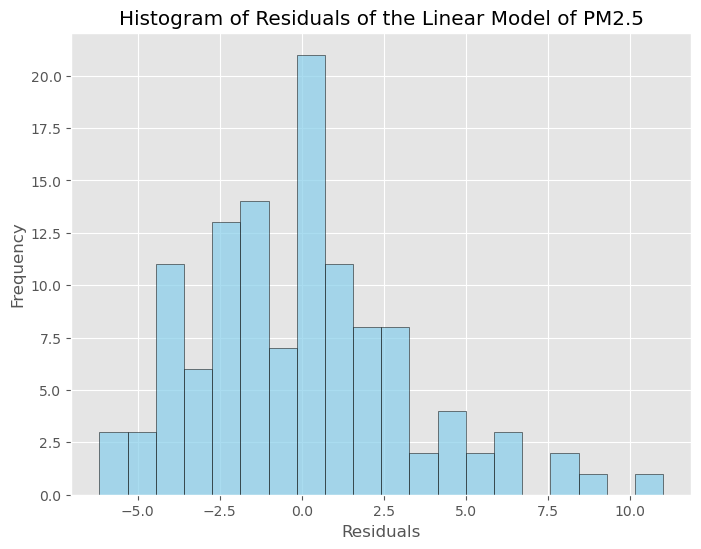

In [84]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(airquality_weather_PM205.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model of PM2.5')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

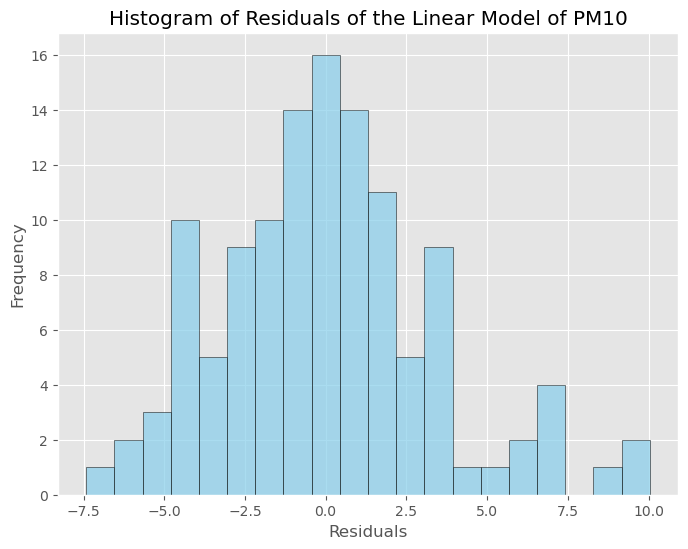

In [85]:
# Histogram of residuals

# Set the figure size
plt.figure(figsize=(8, 6))  

# Plotting the histogram
plt.hist(airquality_weather_PM10.resid, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of the Linear Model of PM10')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

# Q-Q plot

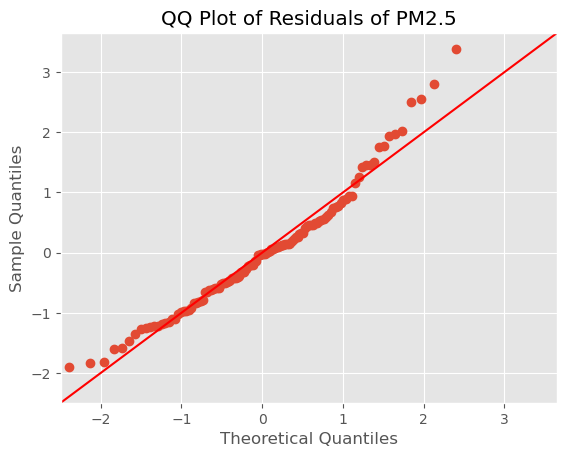

In [80]:
# (optional) the QQ plot of residuals
# More details: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html
fig = sm.qqplot(airquality_weather_PM205.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals of PM2.5')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()

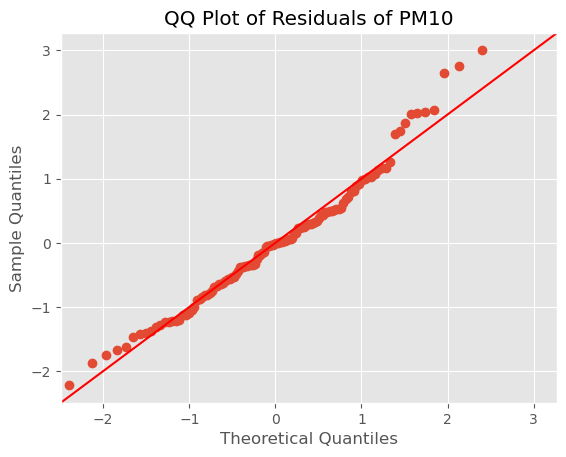

In [79]:
# (optional) the QQ plot of residuals
# More details: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html
fig = sm.qqplot(airquality_weather_PM10.resid, fit=True, line="45")
plt.title('QQ Plot of Residuals of PM10')

# Adding grid lines (optional)
plt.grid(True)

# Display the plot
plt.show()